In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

velocity = [20,30,40,50,60,70,80]
drag_force =[70,380,550,610,1220,830,1450]

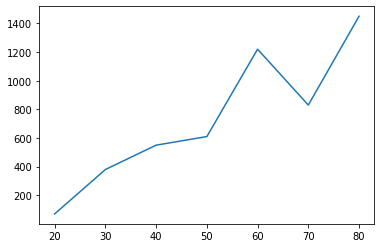

In [5]:
# Neye benzıyor bakalım
plt.plot(velocity,drag_force)
plt.show()

In [6]:
dataset = {
    "velocity" :[20,30,40,50,60,70,80],
    "drag_force" :[70,380,550,610,1220,830,1450]      
}
dataset
df = pd.DataFrame(dataset)

In [7]:
df

,velocity,drag_force
0,20,70
1,30,380
2,40,550
3,50,610
4,60,1220
5,70,830
6,80,1450


In [8]:
# betimsel istatiklerimiz
df.describe().T

,count,mean,std,min,25%,50%,75%,max
velocity,7.0,50.0,21.602469,20.0,35.0,50.0,65.0,80.0
drag_force,7.0,730.0,478.434949,70.0,465.0,610.0,1025.0,1450.0


In [9]:
# Modelleme
import statsmodels.api as sm

X = df[["velocity"]]
X = sm.add_constant(X)  # Matris islemleri yapilabilmesi icin
X

,const,velocity
0,1.0,20
1,1.0,30
2,1.0,40
3,1.0,50
4,1.0,60
5,1.0,70
6,1.0,80


In [10]:
y = df["drag_force"]
lm = sm.OLS(y,X) # Lineer model. y bagimsiz degiskenimiz , ile X Bagimli degiskeni
model = lm.fit() # Gercek modeli fit ediyoruz

In [11]:
model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             drag_force   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     27.86
Date:                Thu, 04 Nov 2021   Prob (F-statistic):            0.00325
Time:                        21:19:51   Log-Likelihood:                -45.997
No. Observations:                   7   AIC:                             95.99
Df Residuals:                       5   BIC:                             95.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -289.6429    208.053     -1.392      0.223    -824.461     245.175
velocity      20.3929      3.863      5.278      0.003      10.462      30.324
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.464
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.087
Skew:                          -0.170   Prob(JB):                        0.957
Kurtosis:                       2.571   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.params

const      -289.642857
velocity     20.392857
dtype: float64

In [13]:
model.conf_int()

,0,1
const,-824.461035,245.175321
velocity,10.461533,30.324181


In [14]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0032


In [15]:
model.rsquared # R2 degeri

0.8478463250743722

In [16]:
model.fittedvalues[0:5]

0    118.214286
1    322.142857
2    526.071429
3    730.000000
4    933.928571
dtype: float64

In [17]:
y[0:5] # Gercek degerler

0      70
1     380
2     550
3     610
4    1220
Name: drag_force, dtype: int64

In [18]:
# Modelimiz matematiksel bir fonksiyon uretiyor . Bu modelin denklemi??
print("drag_force = " +  str("%.2f" % model.params[0]) + " + Velocity" + "*" + str("%.2f" % model.params[1]))

drag_force = -289.64 + Velocity*20.39


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


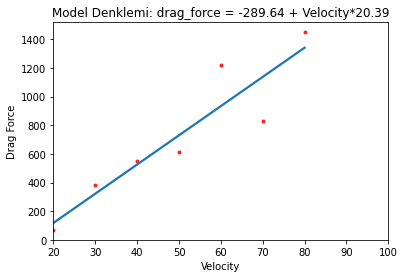

In [19]:
import seaborn as sns
g = sns.regplot(df["velocity"], df["drag_force"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: drag_force = -289.64 + Velocity*20.39")
g.set_ylabel("Drag Force")
g.set_xlabel("Velocity")
import matplotlib.pyplot as plt
plt.xlim(20,100)
plt.ylim(bottom=0);

## Errors

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
import statsmodels.formula.api as smf
lm = smf.ols("drag_force ~ velocity", df)
model = lm.fit()

In [31]:
mse = mean_squared_error(y,model.fittedvalues)
mse

29852.551020408173

In [32]:
import numpy as np
rmse = np.sqrt(mse)
rmse

172.77890791531289